# Dimentionality Reduction and Clustering

**Dimentionality Reduction** is the process of converting data set having vast dimensions into data set with lesser dimensions ensuring that it conveys similar information concisely.

The collection of issues that arise when dealing with high dimensional data. More data is good. More detailed data (dimensions) might not be. This is called the Curse Of Dimensionality.

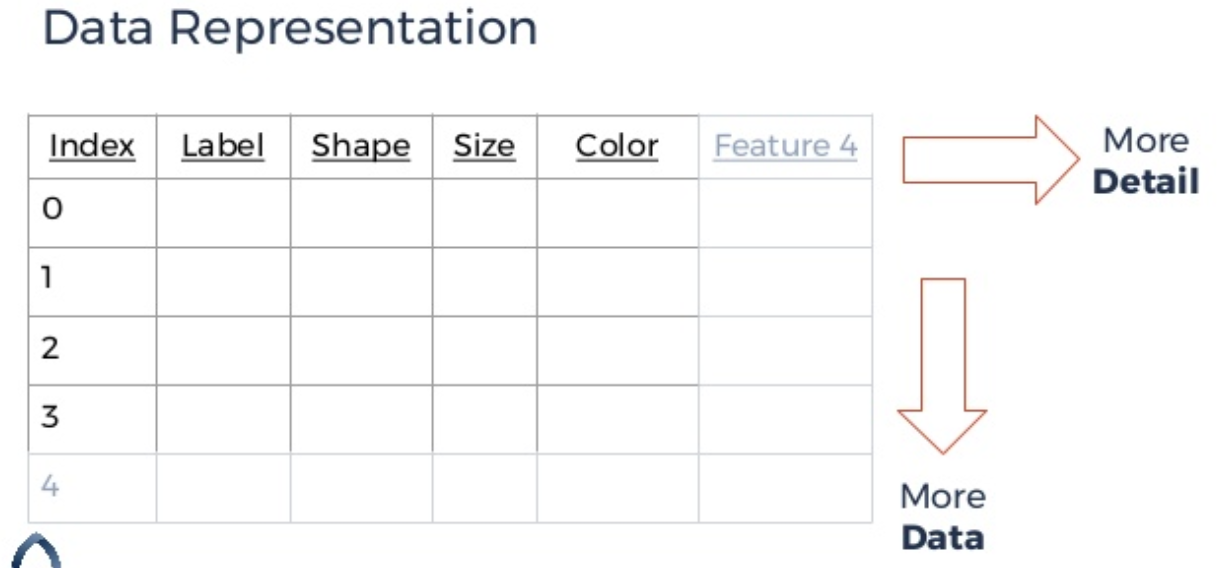

In [8]:
from IPython.display import Image
Image(filename='images/4.png', width=400, height=400)

Just adding one more feature could increase the amount of data that it might demand an additional power.

**Understanding the Curse**

Consider a 3 -class pattern recognition problem. 
1. Strat with 1 dimension/feature 
2. Divide the feature space into uniform bins 
3. Compute the ratio of examples for each class at each bin 
4. For a new example, find its bin and choose the predominant class in that bin

In this case, We decide to start with one feature and divide the real line into 3 bins - but exists overlap between classes, so let’s add 2nd Feature to improve discrimination.

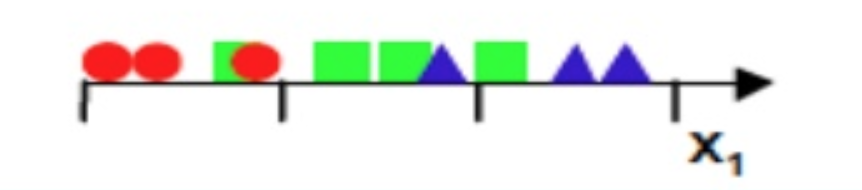

In [9]:
from IPython.display import Image
Image(filename='images/5.png', width=400, height=400)

**2 dimensions** 

Two dimensions increases the number of bins from 3 to 32 =9 
So, Which should we maintain constant? The total number of examples? 
This results in a 2D scatter plot, Reduced Overlapping and Higher Sparsity.

To address sparsity, what about keeping the density of examples per bin constant (say 3)?
This increases the number of examples from 9 to 27 ( 9 x 3 = 27 , at the least)

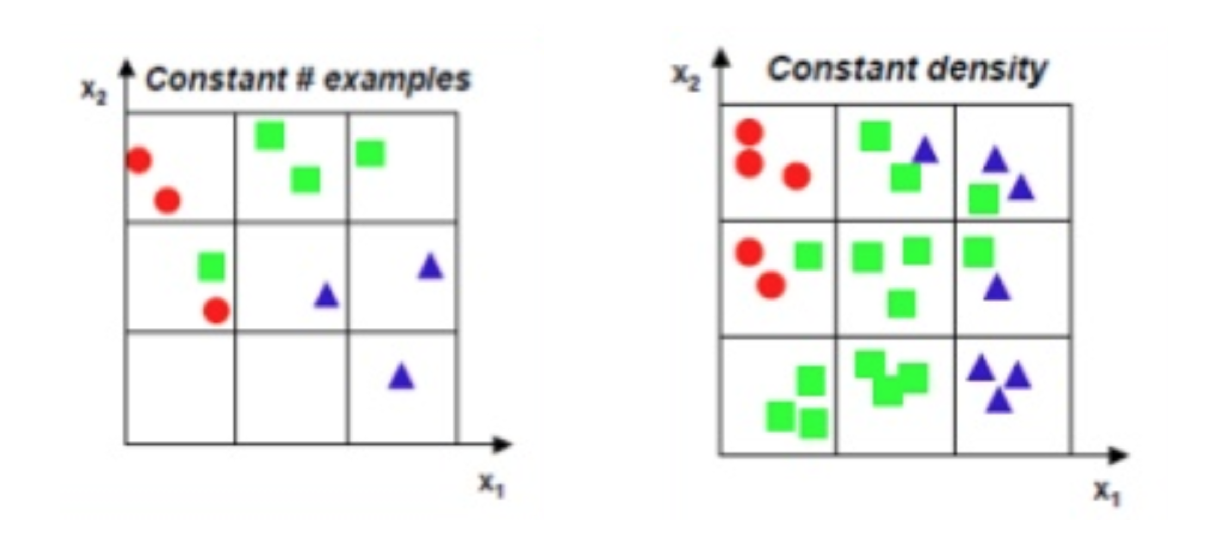

In [10]:
from IPython.display import Image
Image(filename='images/6.png', width=400, height=400)

**3 dimensions** 

- The number of bins grow to 3^3 = 27
- For same number of examples, 3D scatter plot is almost empty
- Constant Density: To keep the initial density of 3, required examples, 27 X 3 = 81

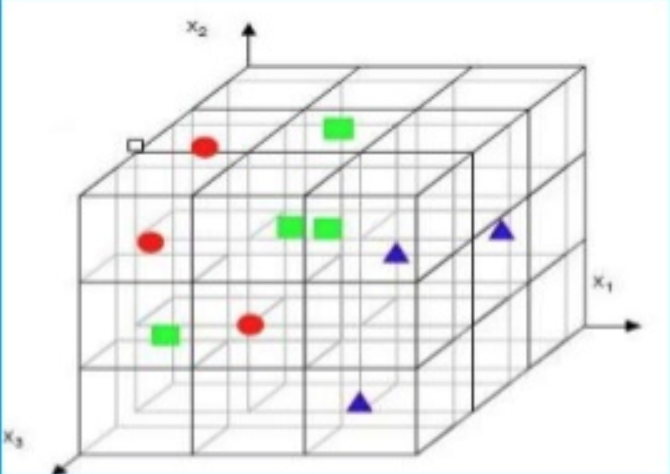

In [11]:
from IPython.display import Image
Image(filename='images/7.png', width=400, height=400)

**Implications of the Curse of Dimentionality** 

There will be an exponential growth with dimensionality in the number of examples required to accurately estimate a function.
In practice, the curse of dimensionality means that for a given sample size, there is a maximum number of features above which the performance of a classifier will degrade rather than improve. 
In most cases the information that is lost by discarding some features is compensated by more accurate mapping in lower dimensional space

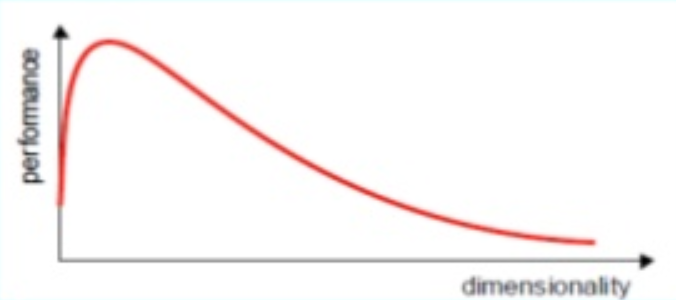

In [12]:
from IPython.display import Image
Image(filename='images/8.png', width=400, height=400)

**Uses of Reduced Dimensions** 

Dimensionality reduction aims to map the data from the original dimension space to a lower dimension space while minimizing (relevant) information loss.

- Computation: Less dimensions allow us to compute models more efficiently. 
- Visualization: Difficult to visualize more than 3 dimensions, lesser the dimentions better is the understanding.
- Removes Useless Information 

**Types of Dimensionality Reduction** 

1. Feature Selection: Select some features from the originally available set.
2. Feature Extraction: Generate synthetic features that represent the availble features.

**Principal Component Analysis (PCA):**

This falls under 'Feature Extraction' type of Dimensionality Reduction. In this tutorial, we will see how by combining this PCA technique together with Cluster Analysis we can represent in a two-dimensional space data defined in a higher dimensional one while, at the same time, be able to group this data in similar groups or clusters and find hidden relationships in our data.

More concretely, PCA reduces data dimensionality by finding principal components. These are the directions of maximum variation in a dataset. By reducing a dataset original features or variables to a reduced set of new ones based on the principal components, we end up with the minimum number of variables that keep the maximum amount of variation or information about how the data is distributed. If we end up with just two of these new variables, we will be able to represent each sample in our data in a two-dimensional chart (e.g. a scatterplot).

As an unsupervised data analysis technique, clustering organises data samples by proximity based on its variables. By doing so we will be able to understand how each data point relates to each other and discover groups of similar ones. Once we have each of this groups or clusters, we will be able to define a centroid for them, an ideal data sample that minimises the sum of the distances to each of the data points in a cluster. By analysing these centroids' variables we will be able to define each cluster in terms of its characteristics.

**Preparing and loading dataset**

In [13]:
import urllib

local_tb_existing_file = 'indicator_estimated prevalence all tb per 100000 - Data.csv'

In [14]:
import pandas as pd
    
existing_df = pd.read_csv(
    local_tb_existing_file, 
    index_col = 0, 
    thousands  = ',')
existing_df.index.names = ['country']
existing_df.columns.names = ['year']

We have specified index_col to be 0 since we want the country names to be the row labels. 
We also specified the thousands separator to be ',' so Pandas automatically parses cells as numbers. 
We can use head() to check the first few lines.

In [15]:
existing_df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


**Dimensionality Reduction with PCA**

we want to be able to represent each country in a two dimensional space. In our dataset, each sample is a country defined by 18 different variables, each one corresponding to TB cases counts per 100K (existing, new, deaths) for a given year from 1990 to 2007. These variables represent not just the total counts or average in the 1990-2007 range but also all the variation in the time series and relationships within countries in a given year. By using PCA we will be able to reduce these 18 variables to just the two of them that best captures that information.

In order to do so, we will first how to perform PCA and plot the first two PCs in Python.

Python's sklearn machine learning library comes with a PCA implementation. This implementation uses the scipy.linalg implementation of the singular value decomposition. 

It only works for dense arrays (see numPy dense arrays or sparse array PCA if you are using sparse arrays) and is not scalable to large dimensional data. For large dimensional data we should consider something such as Spark's dimensionality reduction features. 

In our case we just have 18 variables, and that is far from being a large number of features for today's machine learning libraries and computer capabilities.

When using this implementation of PCA we need to specify in advance the number of principal components we want to use. Then we can just call the fit() method with our data frame and check the results.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(existing_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

This gives us an object we can use to transform our data by calling transform. Or we could have just called fit_transform to perform both steps in one single call.

In both cases we will end up with a lower dimension representation of our data frame, as a numPy array. 

In [17]:
existing_2d = pca.transform(existing_df)

Let's put it in a new data frame.

In [18]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = existing_df.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


We can also print the explained variance ratio as follows.

In [19]:
print(pca.explained_variance_ratio_) 

[0.91808789 0.060556  ]


We see that the first PC already explains almost 92% of the variance, while the second one accounts for another 6% for a total of almost 98% between the two of them.

Now we are ready to plot the lower dimensionality version of our dataset. We just need to call plot on the data frame, by passing the kind of plot we want (see here for more on plotting data frames) and what columns correspond to each axis. We also add an annotation loop that tags every point with its country name.

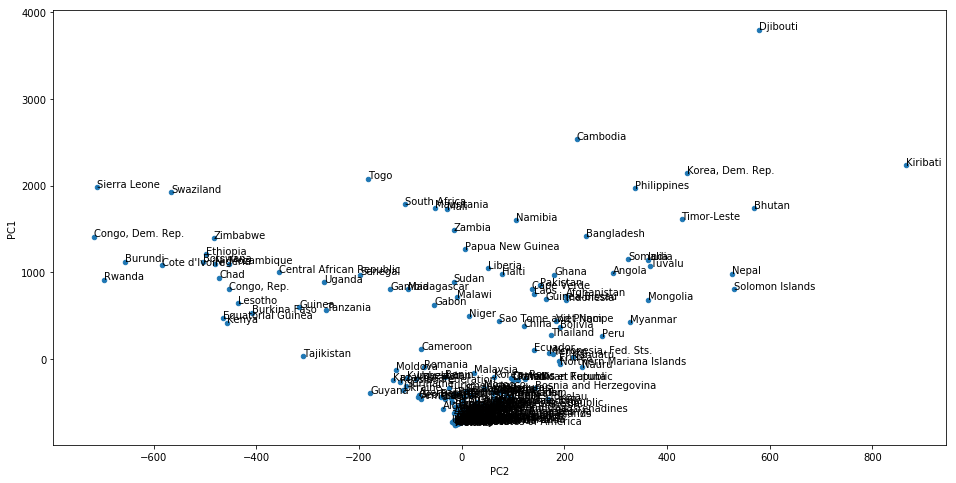

In [20]:
%matplotlib inline

ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(existing_df.index):
    ax.annotate(country, (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1))

Now, let's now create a bubble chart, by setting the point size to a value proportional to the mean value for all the years in that particular country. First we need to add a new column containing the re-scaled mean per country across all the years.

In [21]:
from sklearn.preprocessing import normalize

existing_df_2d['country_mean'] = pd.Series(existing_df.mean(axis=1), index=existing_df_2d.index)
country_mean_max = existing_df_2d['country_mean'].max()
country_mean_min = existing_df_2d['country_mean'].min()
country_mean_scaled = (existing_df_2d.country_mean-country_mean_min) / country_mean_max
existing_df_2d['country_mean_scaled'] = pd.Series(
    country_mean_scaled, 
    index=existing_df_2d.index)
existing_df_2d.head()

,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Afghanistan,732.215864,203.381494,353.333333,0.329731
Albania,-613.296510,4.715978,36.944444,0.032420
Algeria,-569.303713,-36.837051,47.388889,0.042234
American Samoa,-717.082766,5.464696,12.277778,0.009240
Andorra,-661.802241,11.037736,25.277778,0.021457


Now we are ready to plot using this variable size (we will omit the country names this time since we are not so interested in them).

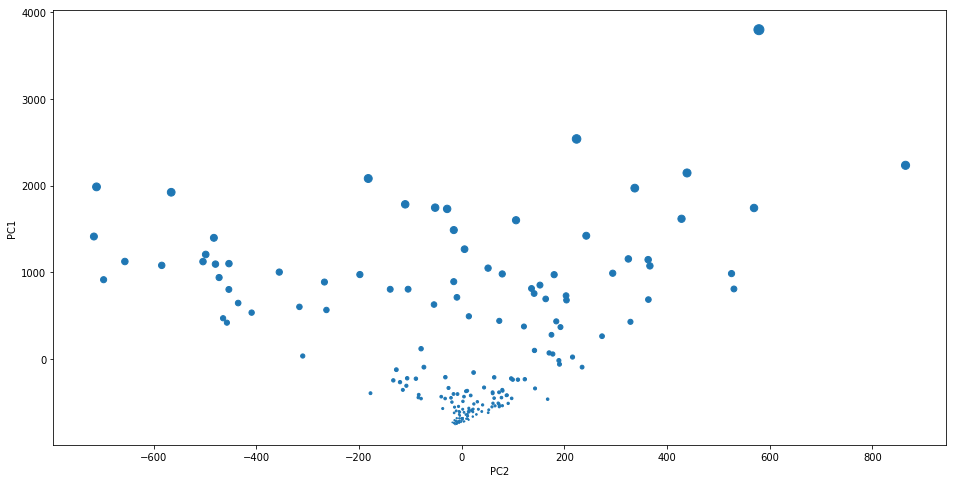

In [22]:
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=existing_df_2d['country_mean_scaled']*100, 
    figsize=(16,8))

Let's do the same with the sum instead of the mean.

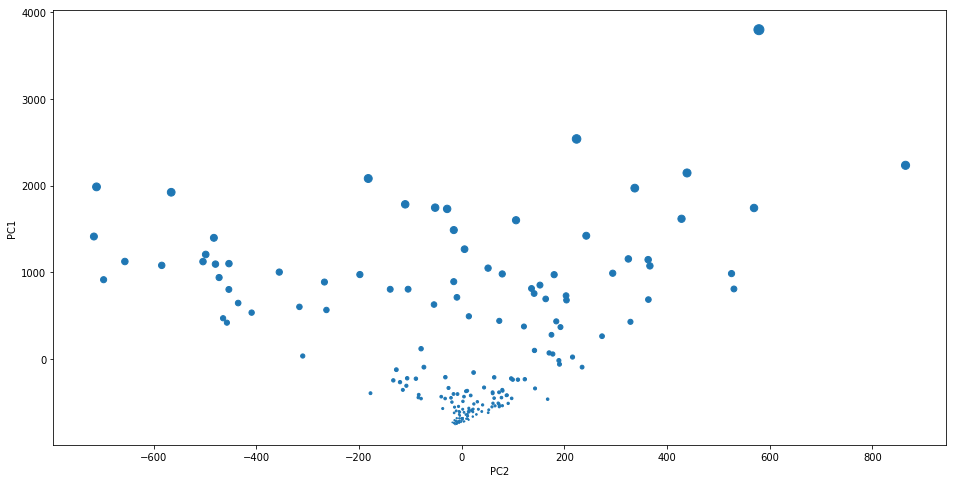

In [23]:
existing_df_2d['country_sum'] = pd.Series(
    existing_df.sum(axis=1), 
    index=existing_df_2d.index)
country_sum_max = existing_df_2d['country_sum'].max()
country_sum_min = existing_df_2d['country_sum'].min()
country_sum_scaled =(existing_df_2d.country_sum-country_sum_min) / country_sum_max
existing_df_2d['country_sum_scaled'] = pd.Series(
        country_sum_scaled, 
        index=existing_df_2d.index)
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_sum_scaled']*100, 
    figsize=(16,8))

And finally let's associate the size with the change between 1990 and 2007. Note that in the scaled version, those values close to zero will make reference to those with negative values in the original non-scaled version, since we are scaling to a [0,1] range.

In [24]:
existing_df_2d['country_change'] = pd.Series(
    existing_df['2007']-existing_df['1990'], 
    index=existing_df_2d.index)
country_change_max = existing_df_2d['country_change'].max()
country_change_min = existing_df_2d['country_change'].min()
country_change_scaled = (existing_df_2d.country_change - country_change_min) / country_change_max
existing_df_2d['country_change_scaled'] = pd.Series(
        country_change_scaled, 
        index=existing_df_2d.index)
existing_df_2d[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
country,,
Afghanistan,-198,0.850840
Albania,-20,1.224790
Algeria,11,1.289916
American Samoa,-37,1.189076
Andorra,-20,1.224790


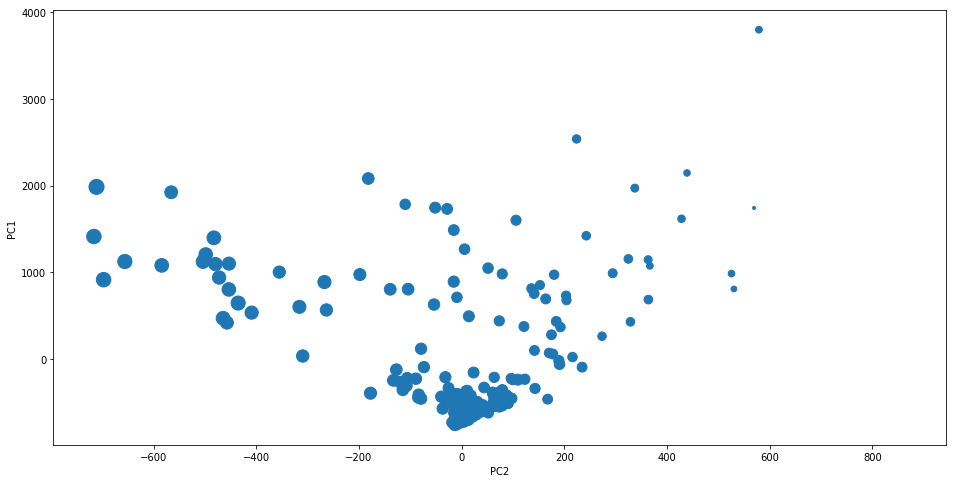

In [34]:
existing_df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=existing_df_2d['country_change_scaled']*100, 
    figsize=(16,8))

### PCA Results

From the plots we have done in Python and R, we can confirm that the most variation happens along the y axis, which we have assigned to PC1. We saw that the first PC already explains almost 92% of the variance, while the second one accounts for another 6% for a total of almost 98% between the two of them. At the very top of our charts we saw an important concentration of countries, most of them developed. While we descend that axis, the number of countries is more sparse, and they belong to less developed regions of the world.

When colouring/sizing points using two absolute magnitudes such as average and total number of cases, we can see that the directions also correspond to a variation in these magnitudes.

Moreover, when using color/size to code the difference in the number of cases over time (2007 minus 1990), the color gradient mostly changed along the direction of the second principal component, with more positive values (i.e. increase in the number of cases) coloured in blue or with bigger size . That is, while the first PC captures most of the variation within our dataset and this variation is based on the total cases in the 1990-2007 range, the second PC is largely affected by the change over time.

### Exploring Data Structure with k-means Clustering

In this section we will use k-means clustering to group countries based on how similar their situation has been year-by-year. That is, we will cluster the data based in the 18 variables that we have. Then we will use the cluster assignment to colour the previous 2D chart, in order to discover hidden relationship within our data and better understand the world situation regarding the tuberculosis disease.

When using k-means, we need to determine the right number of groups for our case. This can be done more or less accurately by iterating through different values for the number of groups and compare an amount called the within-cluster sum of square distances for each iteration. This is the squared sum of distances to the cluster center for each cluster member. Of course this distance is minimal when the number of clusters gets equal to the number of samples, but we don't want to get there. We normally stop when the improvement in this value starts decreasing at a lower rate.

Again we will use sklearn, in this case its k-means clustering implementation, in order to perform our clustering on the TB data. Since we already decided on a number of clusters of 5, we will use it here straightaway.

In [26]:
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(existing_df)


Now we need to store the cluster assignments together with each country in our data frame. The cluster labels are returned in clusters.labels_.

In [27]:
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)

And now we are ready to plot, using the cluster column as color.

The result is pretty much as the one obtained with R, with the color differences and without the country names that we decided not to include here so we can better see the colours. 

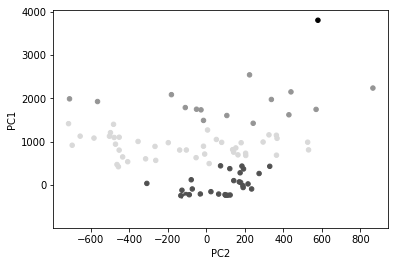

In [32]:
import numpy as np
    
existing_df_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=existing_df_2d.cluster.astype(np.float), 
        figsize=(6,4))

**References:**

https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka

https://www.slideshare.net/kazitoufiq/dimension-reduction-what-why-and-how